In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pathlib
import seaborn as sns
from sklearn import datasets
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
sns.set(font="Kaiti", style="ticks", font_scale=1.4)

In [5]:
# 讀取數據
enbdf = pd.read_excel("/content/ENB.xlsx")
# 對每個變量的取值進行標準化
enbdf_n = (enbdf - enbdf.mean()) / enbdf.std()
enbdf_n.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.7593,-1.813393,-0.669679
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.7593,-1.813393,-0.669679
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.7593,-1.813393,-0.669679
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.7593,-1.813393,-0.669679
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.7593,-1.813393,-0.145408


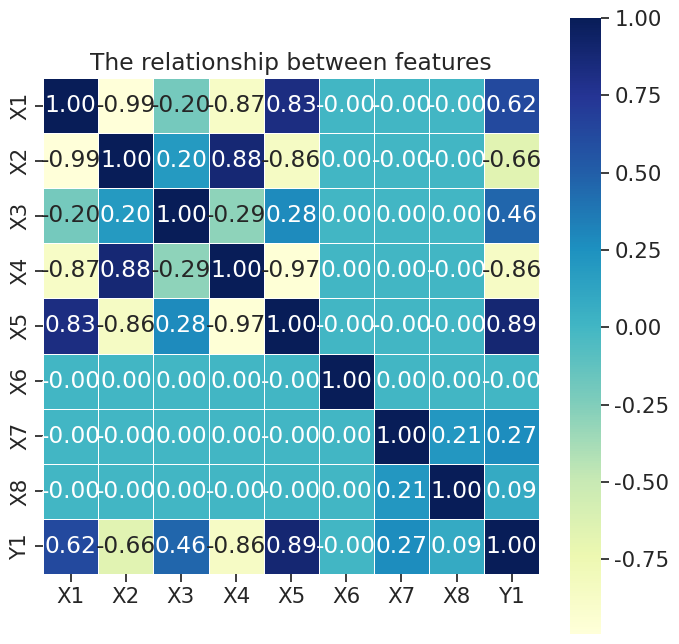

In [10]:
# 使用相關係數熱力圖可視化變量之間的相關性
datacor = enbdf_n.corr() #默認計算pearson相關係數
# 熱力圖可視化相關係數
plt.figure(figsize=(8,8))
# annot為True會在格子上顯示數字
ax = sns.heatmap(datacor, square=True,annot=True,fmt=".2f",linewidths=.5,cmap="YlGnBu")
ax.set_title("The relationship between features")
plt.show()

In [12]:
X = np.array(enbdf_n)[:,:-1] # 樣本特征
y = np.array(enbdf_n)[:,-1] #樣本標籤

from sklearn.model_selection import train_test_split
# 拆分數據集
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_test, y_test))

0.9105523901330069
